## Problem 1: Program DFS for Undirected Graph Data Structure

We will now program an undirected graph using the adjacency list representation in Python along with some utility functions including a depth first search algorithm over undirected graphs. 

Recall that a graph is undirected if for every edge $(u,v)$ in the graph from $u$ to $v$ there is also the edge in the reverse direction  $(v,u)$ from $v$ to $u$.

## 1A 

Run through DFS for the example graph below.

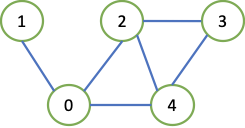

Assume that the DFS visit starts from the node 0. Assume adjacent nodes are visited in 
ascending order of node IDs.

(a) Write down the order in which the nodes are visited.

(b) Complete the table of discovery and finish times for each node.

(c) For each node write down its parent node in the DFS tree. Recall that if DFS discovers node j from node i, then the parent of j in the DFS tree is i. Draw the DFS tree.

(d) What are the back edges discovered by DFS? Disregard all trivial back edges $(i,j)$ where $j$ is a parent of node i in the DFS tree.

Please note that this problem will not be graded. You are encouraged to compare your answers with our solutions.

YOUR ANSWER HERE

### 1 B

Complete the code for the `dfs_visit` function below. 

To do so, please read the rest of the code provided and the surrounding comments very  carefully. 

Please ensure that the following rules are followed:

- When visiting a node i, consider the set of adjacent nodes in increasing order.
  - This is automatically done for you when you get `self.adj_list[i]` which is implemented as a python set.
- Use the `DFSTimeCounter` class provided to keep track of DFS time.
- The timer should be incremented just before we return from `dfs_visit` and record the finish time for a node.
- Recall that a back edge in a DFS is encountered whenever we visit a node i and   encounter adjacent node j such that j has been discovered but not finished.
  - If this happens, add (i,j) to the set of back edges.
  
The `dfs_visit` code does not return anything but updates the arguments `discovery_times`, `finish_times`, `dfs_tree_parent` and `dfs_back_edges` in place.

In [ ]:
# This is a useful data structure for implementing 
# a counter that counts the time.
class DFSTimeCounter:
    def __init__(self):
        self.count = 0
    
    def reset(self):
        self.count = 0
    
    def increment(self):
        self.count = self.count + 1
        
    def get(self):
        return self.count 
    
class UndirectedGraph:
    
    # n is the number of vertices
    # we will label the vertices from 0 to self.n -1 
    # Initialize to an empty adjacency list
    # We will store the outgoing edges using a set data structure
    def __init__(self, n):
        self.n = n
        self.adj_list = [ set() for i in range(self.n) ]
        
    def add_edge(self, i, j):
        assert 0 <= i < self.n
        assert 0 <= j < self.n
        assert i != j
        # Make sure to add edge from i to j
        self.adj_list[i].add(j)
        # Also add edge from j to i
        self.adj_list[j].add(i)
        
    # get a set of all vertices that 
    # are neighbors of the
    # vertex i
    def get_neighboring_vertices(self, i):
        assert 0 <= i < self.n
        return self.adj_list[i]
    
    # Function: dfs_visit
    # Program a DFS visit of a graph.
    # We maintain a list of discovery times and finish times.
    # Initially all discovery times and finish times are set to None.
    # When a vertex is first visited, we will set discovery time
    # When DFS visit has processed all the neighbors then 
    # set the finish time.
    # DFS visit should update the list of discovery and finish times in-place
    # Arguments
    #  i --> id of the vertex being visited.
    #  dfs_timer --> An instance of DFSTimeCounter structure provided for you.
    #  discovery --> discovery time of each vertex -- a list of size self.n
    #                None if the vertex is yet to be visited.
    #  finish --> finish time of each vertex -- a list of size self.n
    #                None if the vertex is yet to be finished.
    #  dfs_tree_parent --> the parent for for each node 
    #                       if we visited node j from node i, then j's parent is i.
    #                      Do not forget to set tree_parent when you call dfs_visit 
    #                                                         on node j from node i.
    #  dfs_back_edges --> a list of back edges.
    #                     a back edge is an edge from i to j wherein
    #                     DFS has already discovered j when i is discovered 
    #                                     but not finished j
    
    def dfs_visit(self, i, dfs_timer, discovery_times, finish_times, 
                        dfs_tree_parent, dfs_back_edges):
        assert 0 <= i < self.n
        assert discovery_times[i] == None
        assert finish_times[i] == None
        discovery_times[i] = dfs_timer.get()
        dfs_timer.increment()
        # your code here
        
    
    # Function: dfs_traverse_graph
    # Traverse the entire graph.
    def dfs_traverse_graph(self):
        dfs_timer = DFSTimeCounter()
        discovery_times = [None]*self.n
        finish_times = [None]*self.n
        dfs_tree_parents = [None]*self.n
        dfs_back_edges = []
        for i in range(self.n):
            if discovery_times[i] == None:
                self.dfs_visit(i,dfs_timer, discovery_times, finish_times, 
                               dfs_tree_parents, dfs_back_edges)
        # Clean up the back edges so that if (i,j) is a back edge then j cannot
        # be i's parent.
        non_trivial_back_edges = [(i,j) for (i,j) in dfs_back_edges if dfs_tree_parents[i] != j]
        return (dfs_tree_parents, non_trivial_back_edges, discovery_times, finish_times)

    

In [ ]:
# create the graph from problem 1A.
g = UndirectedGraph(5)
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(0,4)
g.add_edge(2,3)
g.add_edge(2,4)
g.add_edge(3,4)


# Test DFS visit
discovery_times = [None]*5
finish_times = [None]*5
dfs_tree_parents = [None]*5
dfs_back_edges = []
g.dfs_visit(0, DFSTimeCounter(), discovery_times, finish_times, dfs_tree_parents, dfs_back_edges )

print('DFS visit discovery and finish times given by your code.')
print('Node\t Discovery\t Finish')
for i in range(5):
    print(f'{i} \t {discovery_times[i]}\t\t {finish_times[i]}')

assert(discovery_times[0] == 0), f'Fail: Node 0 expected discovery time must be 0'
assert(discovery_times[1] == 1), f'Fail: Node 1 expected discovery is 1'
assert(finish_times[1] == 2), f'Fail: Node 1 finish time expected value is 2 (are you incrementing counter before you return from dfs_visit function and before recording finish times)'
assert(discovery_times[2] == 3), f'Fail: Node 2 expected discovery is 3'
assert(finish_times[2] == 8), f'Fail: Node 2 finish time expected value is 8'
assert(discovery_times[3] == 4),f'Fail: Node 3 discovery time expected value is 4'
assert(finish_times[3] == 7), f'Fail: Node 3 finish time expected value is 7'
assert(discovery_times[4] == 5),f'Fail: Node 4 discovery time expected value is 5'
assert(finish_times[4] == 6), f'Fail: Node 4 finish time expected value is 6'

print('Success -- discovery and finish times seem correct.')
print()
    
print('Node\t DFS-Tree-Parent')
for i in range(5):
    print(f'{i} \t {dfs_tree_parents[i]}')

assert(dfs_tree_parents[0] == None), 'Fail: node 0 cannot have a parent (must be root)'
assert(dfs_tree_parents[1] == 0), 'Fail: node 1 parent must be 0'
assert(dfs_tree_parents[2] == 0), 'Fail: node 2 parent must be 0'
assert(dfs_tree_parents[3] == 2), 'Fail: node 3 parent must be 2'
assert(dfs_tree_parents[4] == 3), 'Fail: node 4 parent must be 3'

print('Success-- DFS parents are set correctly.')


print()
# Filter out all trivial back eddges (i,j)  where j is simply the parent of i.
# such back edges occur because we are treating an undirected edge as two directed edges
# in either direction.
non_trivial_back_edges = [(i,j) for (i,j) in dfs_back_edges if dfs_tree_parents[i] != j]
print('Back edges are')
for (i,j) in non_trivial_back_edges:
    print(f'{(i,j)}')
    
    
assert len(non_trivial_back_edges) == 2, f'Fail: There must be 2 non trivial back edges -- your code reports {len(non_trivial_back_edges)}. Note that (4,0) and (4,2) are the only non trivial backedges'
assert (4,2) in non_trivial_back_edges, '(4,2) must be a backedge that is non trivial'
assert (4,0) in non_trivial_back_edges, '(4,3) must be a non-trivial backedges'

print('Success -- 15 points!')

## 1 C 

Find the number of (maximal) strongly connected components in an undirected graph from the results of a DFS. Implement the function `num_connected_components` that takes in a graph `g` and returns a number that indicates the number of MSCCs in the directed graph.

#### Example

Consider the graph below 

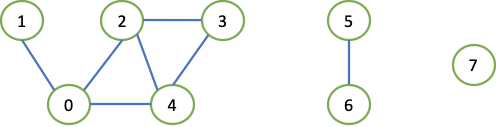

It has 3 maximal strongly connected components that have vertices $\{0,1,2,3,4\}$, 
$\{5,6\}$ and $\{7\}$, respectively. Given such a graph, your function must return the number 3.

**Hint** Examine  the `dfs_traverse_graph` function carefully. How do you distinguish different connected components in a graph from the DFS tree?

In [ ]:
def num_connected_components(g): # g is an UndirectedGraph class
    # your code here
    

In [ ]:
# create the graph from problem 1A.
g = UndirectedGraph(5)
g.add_edge(0,1)
g.add_edge(0,2)
g.add_edge(0,4)
g.add_edge(2,3)
g.add_edge(2,4)
g.add_edge(3,4)

assert num_connected_components(g) == 1, f' Test A failed: g must have 1 connected component. Your code returns {num_connected_components(g)}'


g2 = UndirectedGraph(7)
g2.add_edge(0,1)
g2.add_edge(0,2)
g2.add_edge(0,4)
g2.add_edge(2,3)
g2.add_edge(2,4)
g2.add_edge(3,4)
g2.add_edge(5,6)

assert num_connected_components(g2) == 2, f' Test B failed: g2 must have 2 connected components. Your code returns {num_connected_components(g2)}'


g3 = UndirectedGraph(8)
g3.add_edge(0,1)
g3.add_edge(0,2)
g3.add_edge(0,4)
g3.add_edge(2,3)
g3.add_edge(2,4)
g3.add_edge(3,4)
g3.add_edge(5,6)

assert num_connected_components(g3) == 3, f' Test C failed: g3 must have 3 connected components. Your code returns {num_connected_components(g3)}'

g3.add_edge(7,5)
assert num_connected_components(g3) == 2, f' Test D failed: g3 must now have 2 connected components. Your code returns {num_connected_components(g3)}'



## 1C 

We now wish to find the set of all nodes in the graph that belong to some cycle.

###  Example

Consider the example below:
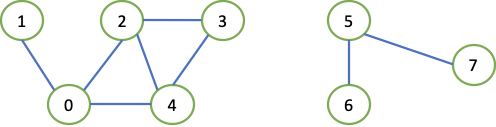

Nodes $\{0, 2, 3, 4\}$ lie on some cycle: example node 4 lies on many cycles one such cycle being $2-3-4$. whereas the other nodes do not.

__Note__ We do _not_ treat undirected edges as cycles although in our data structure, when an undirected edge $(i,j)$ is represented as two "directed" edges $(i,j)$ and $(j,i)$, it gives the impression that they are in a cycle of length 2.

Complete the function `find_all_nodes_in_cycle` that given a graph returns a python set of nodes in a cycle.

**Hint** Perform a DFS traversal and for each _non trivial_ back edge discovered, use the DFS tree to figure out the nodes that must be on the cycle corresponding to that back edge.


In [ ]:
def find_all_nodes_in_cycle(g): # g is an UndirectedGraph class
    set_of_nodes = set()
    # your code here
    
    

In [ ]:
#this is the example that we had for the problem.
g3 = UndirectedGraph(8)
g3.add_edge(0,1)
g3.add_edge(0,2)
g3.add_edge(0,4)
g3.add_edge(2,3)
g3.add_edge(2,4)
g3.add_edge(3,4)
g3.add_edge(5,6)
g3.add_edge(5,7)

s = find_all_nodes_in_cycle(g3)
print(f'Your code returns set of nodes: {s}')
assert s == {0,2,3,4}, 'Fail: Set of nodes must be {0,2,3,4}.'

# let's also add the edge 6,7
g3.add_edge(6,7)
s1 = find_all_nodes_in_cycle(g3)
print(f'Your code returns set of nodes: {s1}')
assert s1 == {0,2,3,4,5,6,7}, 'Fail: Set of nodes must be {0,2,3,4,5,6,7}.'

print('All tests passedd: 10 points!')

## Solution to Problem 1 (A)

DFS works as follows
 - Start at node 0 (time 0)
 - Discover node 1 (time 1)
 - Finish node 1 (time 2)
 - Discover node 2 (time 3)
 - Discover node 3 (time 4)
 - Discover node 4 (time 5)
 - Finish node 4 (time 6)
 - Finish node 3 (time 7)
 - Finish node 2 (time 8)
 - Finish node 0 (time 9)
 
The table of discovery and finish times are 

- Node 0 - discovery : 0 finish: 9
- Node 1 - discovery : 1 finish : 2
- Node 2 - discovery: 3 finish: 8
- Node 3 - discovery: 4 finish 7
- Node 4 - discovery: 5 finish 6

The parents are

- Node 0 -- None (root node)
- Node 1 -- 0
- Node 2 -- 0
- Node 3 -- 2
- Node 4 -- 3

The back edges discovered are : (4,2) and (4,0)


### That's all folks